In [4]:
!pip install numpy
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 330.3 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/165.9 kB 330.3 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.9 kB 196.9 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 306.3 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 306.3 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 276.8 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.9 kB 273.1 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.9 kB 277.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 317.4 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 32


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

--Data Exploration--

In [7]:
import zipfile

zip_file_path = 'sample data set for assignment.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List files in the ZIP to confirm the CSV file name
    print(zip_ref.namelist())
    
    # Extract and read the CSV file
    with zip_ref.open('sample data set for assignment.csv') as csvfile:
        df = pd.read_csv(csvfile)

df.head()

['sample data set for assignment.csv']


,CustomerID,Age,Gender,Annual Income (LKR),Spending Score (1-100),Campaign Response,Social Media Clicks,Social Media Likes,Social Media Shares
0,1,56,Male,8118160,56,No,68,875,114
1,2,69,Female,13472669,9,Yes,386,5,77
2,3,46,Female,9609640,38,Yes,407,398,57
3,4,32,Male,5039858,90,Yes,331,463,272
4,5,60,Female,11621078,35,No,140,585,173


In [9]:
#get the no of rows and columns
df.shape

(1000000, 9)

In [10]:
df.dtypes

CustomerID                 int64
Age                        int64
Gender                    object
Annual Income (LKR)        int64
Spending Score (1-100)     int64
Campaign Response         object
Social Media Clicks        int64
Social Media Likes         int64
Social Media Shares        int64
dtype: object

In [11]:
# Display missing values in each column
df.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
Annual Income (LKR)       0
Spending Score (1-100)    0
Campaign Response         0
Social Media Clicks       0
Social Media Likes        0
Social Media Shares       0
dtype: int64

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

In [14]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Age,Annual Income (LKR),Spending Score (1-100),Social Media Clicks,Social Media Likes,Social Media Shares
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,44.001458,8.500025e+06,50.515643,249.372198,499.787390,149.667479
std,288675.278932,15.290201,3.750755e+06,28.856459,144.287736,288.724326,86.609099
min,1.000000,18.000000,2.000021e+06,1.000000,0.000000,0.000000,0.000000
25%,250000.750000,31.000000,5.248565e+06,26.000000,125.000000,250.000000,75.000000
50%,500000.500000,44.000000,8.497054e+06,51.000000,249.000000,500.000000,150.000000
75%,750000.250000,57.000000,1.174568e+07,75.000000,374.000000,750.000000,225.000000
max,1000000.000000,70.000000,1.500000e+07,100.000000,499.000000,999.000000,299.000000


In [17]:
# Gender distribution
print("\nGender distribution:")
df['Gender'].value_counts()


Gender distribution:


Gender
Female    500513
Male      499487
Name: count, dtype: int64

In [18]:
# Campaign Response distribution
print("\nCampaign Response distribution:")
df['Campaign Response'].value_counts()


Campaign Response distribution:


Campaign Response
No     700105
Yes    299895
Name: count, dtype: int64

In [19]:
# Cross-tabulation of Campaign Response by Gender
print("\nCampaign Response by Gender:")
print(pd.crosstab(df['Gender'], df['Campaign Response']))


Campaign Response by Gender:
Campaign Response      No     Yes
Gender                           
Female             350029  150484
Male               350076  149411


In [21]:
# Average Social Media Engagement by Campaign Response
print("\nAverage Social Media Engagement by Campaign Response:")
df.groupby('Campaign Response')[['Social Media Clicks', 'Social Media Likes', 'Social Media Shares']].mean()


Average Social Media Engagement by Campaign Response:


,Social Media Clicks,Social Media Likes,Social Media Shares
Campaign Response,,,
No,249.208914,499.456294,149.663588
Yes,249.753384,500.560333,149.676563


--Data Visualization--

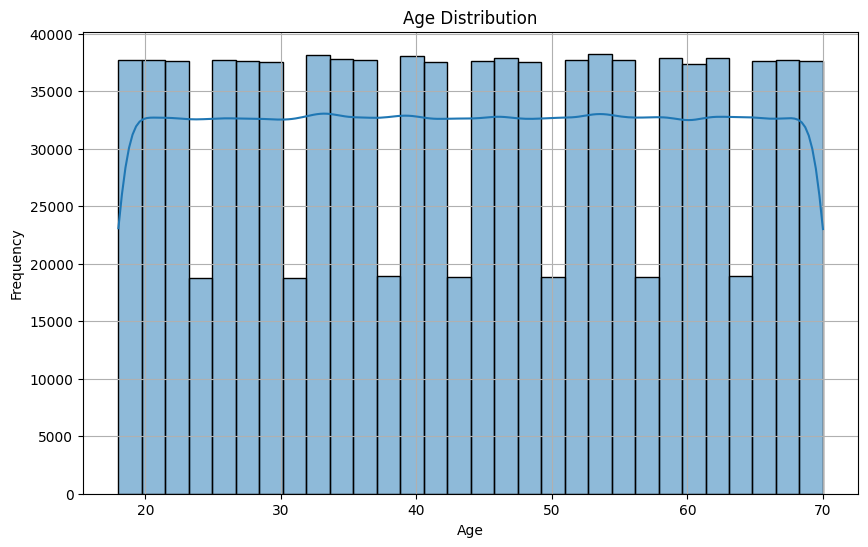

In [30]:
# Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

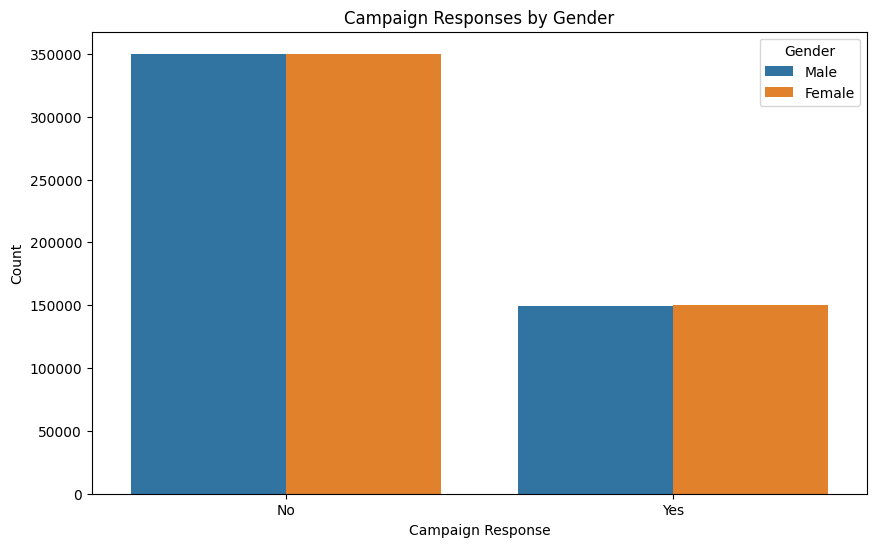

In [31]:
# Bar chart of campaign responses by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Campaign Response', hue='Gender', data=df)
plt.title('Campaign Responses by Gender')
plt.xlabel('Campaign Response')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

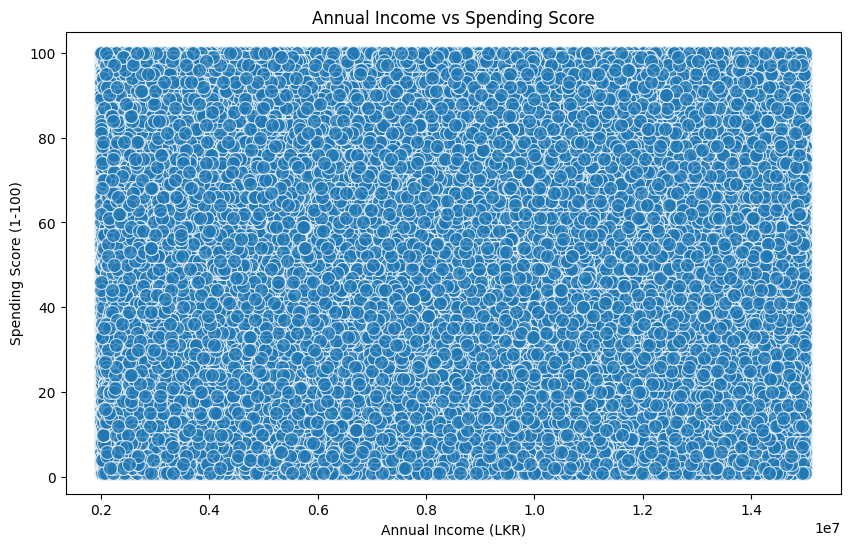

In [34]:
# Scatter plot showing the relationship between annual income (LKR) and spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (LKR)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (LKR)')
plt.ylabel('Spending Score (1-100)')
plt.show()


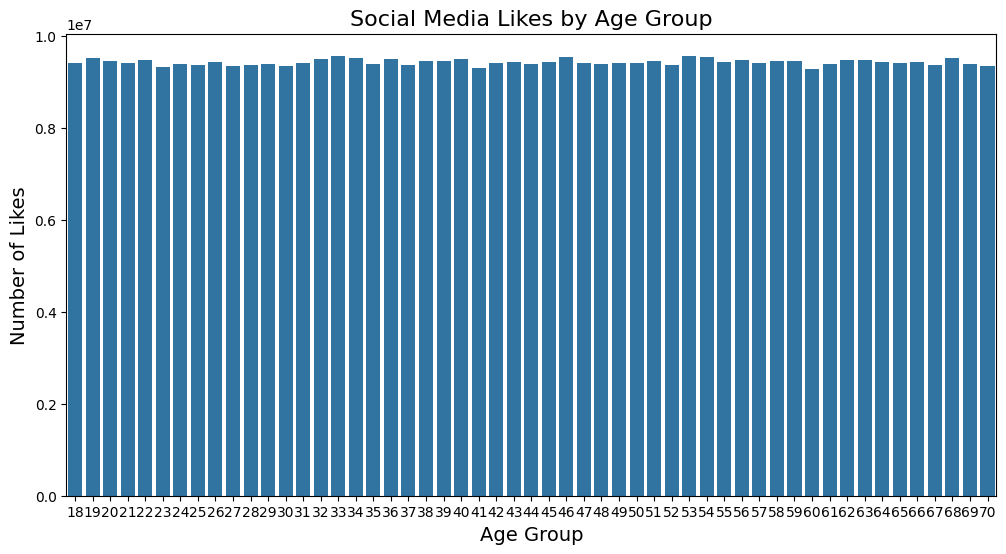

In [35]:
# Group by 'Age' and sum the 'Social Media Likes'
age_likes = df.groupby('Age')['Social Media Likes'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Social Media Likes', data=age_likes)

plt.title('Social Media Likes by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Likes', fontsize=14)

plt.show()

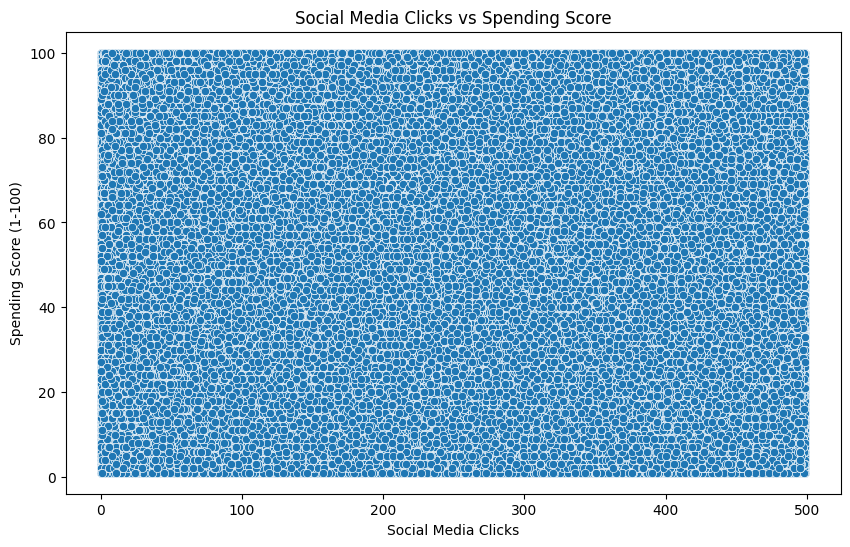

In [36]:
# Scatter plot of social media clicks versus spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social Media Clicks', y='Spending Score (1-100)', data=df)
plt.title('Social Media Clicks vs Spending Score')
plt.xlabel('Social Media Clicks')
plt.ylabel('Spending Score (1-100)')
plt.show()